In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

C:\Users\nicko\anaconda34\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
main_folder = 'D:\\rsna-breast-cancer-detection\\train_images\\'  # Replace with the path to your image folder

img_dir = 'D:\\rsna-breast-cancer-detection\\imgs\\'  # Replace with the path to your image folder
                

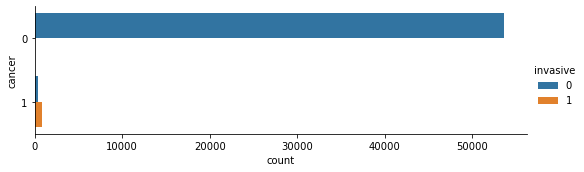

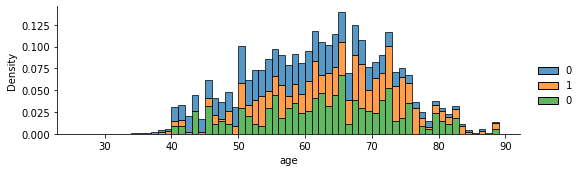

In [3]:
df_train = pd.read_csv('D:\\rsna-breast-cancer-detection\\train.csv')
h = 2.5
a = 3
catplot = sns.catplot(data=df_train, y="cancer", hue="invasive", kind="count", height=h, aspect=a)
#catplot.savefig('catplot.png')

# Plot 2: Displot
displot = sns.displot(data=df_train, x="age", hue=df_train[["cancer", "invasive"]].apply(tuple, axis=1), binwidth=1,
                          stat="density", common_norm=False, multiple="stack", height=h, aspect=a)
#displot.savefig('displot.png')



The provided plot illustrates a moderately higher age demographic among individuals diagnosed with cancer.

average_age_non_cancer 58.43280820765824 max_age_cancer 89.0 min_age_cancer38.0
average_age_cancer 63.67875647668394


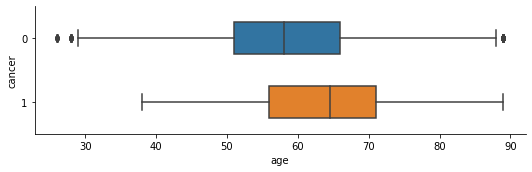

In [4]:
# Assuming df_train is your DataFrame
boxplot = sns.catplot(data=df_train, y="cancer", x="age", kind="box", orient="h", height=h, aspect=a, width=0.5)


cancer_patients = df_train[df_train['cancer'] == 1]

# Calculate the average age for patients with cancer
average_age_cancer = cancer_patients['age'].mean()
max_age_cancer = cancer_patients['age'].max()
min_age_cancer = cancer_patients['age'].min()



# Filter the DataFrame for patients without cancer
non_cancer_patients = df_train[df_train['cancer'] == 0]

# Calculate the average age for patients without cancer
average_age_non_cancer = non_cancer_patients['age'].mean()
print(f"average_age_non_cancer {average_age_non_cancer} max_age_cancer {max_age_cancer} min_age_cancer{min_age_cancer}")
print(f"average_age_cancer {average_age_cancer}")



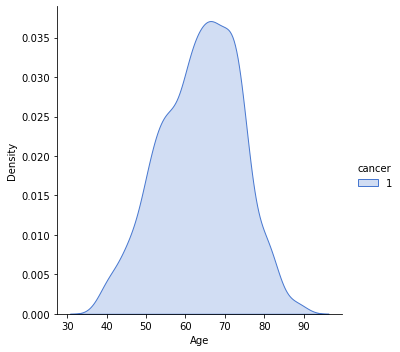

In [5]:
# Creating the distribution plot
cancer_patients = df_train[df_train['cancer'] == 1]

sns.displot(data=cancer_patients, x='age', hue='cancer', kind='kde', fill=True, palette='muted')

# Adding labels and title
#plt.title('Distribution of Cancer Patients by Age')
plt.xlabel('Age')
plt.ylabel('Density')

# Display the plot
plt.savefig("dist_cancer_patients_by_age.png", bbox_inches='tight', facecolor='white')

In [6]:
def has_cancer(l):
    if len(l) == 1:
        if l[0] == 0:
            return False
        elif l[0] == 1:
            return True
        else:
            raise Exception
    elif len(l) == 2:
        return True
    else:
        raise Exception

patient_cancer_map = df_train.groupby('patient_id').cancer.unique().apply(lambda l: has_cancer(l))
print(patient_cancer_map)

patient_id
5        False
25       False
28       False
30       False
33       False
         ...  
65518    False
65525    False
65526    False
65530    False
65534    False
Name: cancer, Length: 11913, dtype: bool


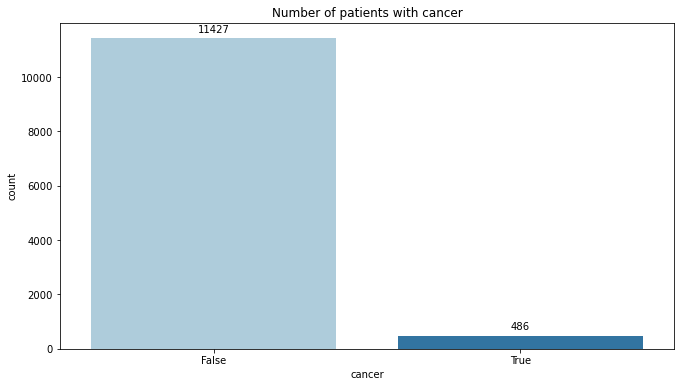

In [7]:
fig, ax = plt.subplots(1,1,figsize=(11,6))

sns.countplot(x=patient_cancer_map, palette='Paired', ax=ax);
ax.set_title('Number of patients with cancer');

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

fig.savefig('num_patients_w_cancer.png')



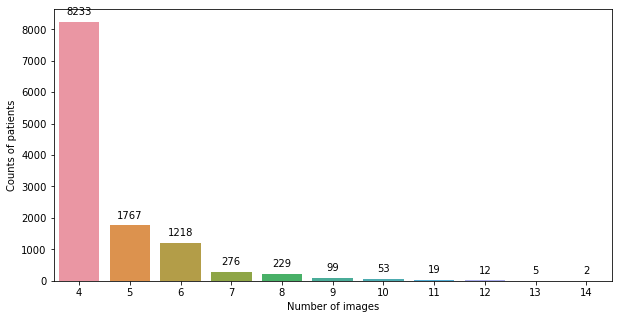

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

sns.countplot(x=df_train.groupby('patient_id').size(), ax=ax)
ax.set_xlabel('Number of images')
ax.set_ylabel('Counts of patients');
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.savefig("patients_per_machine.png", bbox_inches='tight', facecolor='white')


It's an imbalanced classification problem!

In [9]:
print(f"the number of cases with not-malignant cancer cases from biopsy {len(df_train[(df_train['biopsy'] == 1) & (df_train['cancer'] == 0)])}")


the number of cases with not-malignant cancer cases from biopsy 1811


In [10]:
print(f"the number of malignant cancer cases from biopsy {len(df_train[(df_train['biopsy'] == 1) & (df_train['cancer'] == 1)])}")


the number of malignant cancer cases from biopsy 1158


In [11]:
print(f"the number of malignant cancer cases from biopsy {len(df_train[df_train['cancer'] == 1])}")
print(f"the number of malignant non cancer cases from biopsy {len(df_train[df_train['cancer'] == 0])}")

the number of malignant cancer cases from biopsy 1158
the number of malignant non cancer cases from biopsy 53548


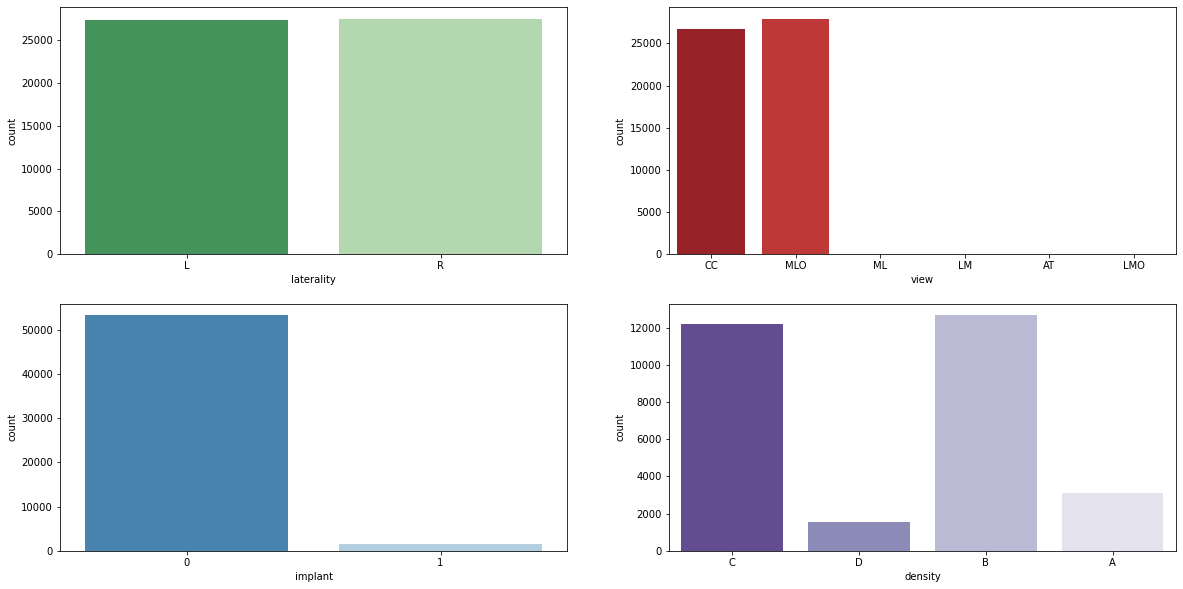

In [12]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.countplot(x=df_train.laterality, ax=ax[0,0], palette='Greens_r')
sns.countplot(x=df_train.view, ax=ax[0,1], palette='Reds_r')
sns.countplot(x=df_train.implant, ax=ax[1,0], palette='Blues_r')
sns.countplot(x=df_train.density, ax=ax[1,1], palette='Purples_r');
plt.savefig("patients_per_categories.png", bbox_inches='tight', facecolor='white')


- Most cases are CC and MLO
- Only a few cases show implants
- Most of the images show medium dense images of category B and C

In [13]:
df_train.machine_id.nunique()

10

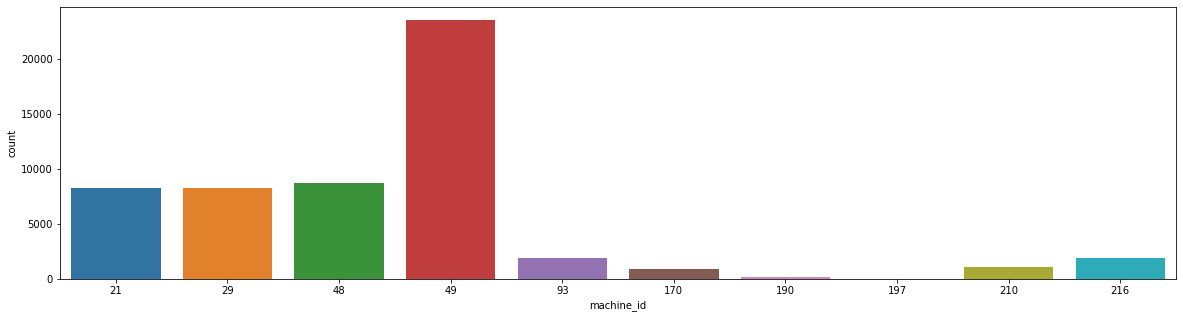

In [14]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
sns.countplot(x=df_train.machine_id, palette='tab10', ax=ax);

- Images were captured using a total of 10 different machines, with a majority of them taken using devices identified by the IDs 49, 21, 29, and 48.

['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age', 'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'density', 'machine_id', 'difficult_negative_case']


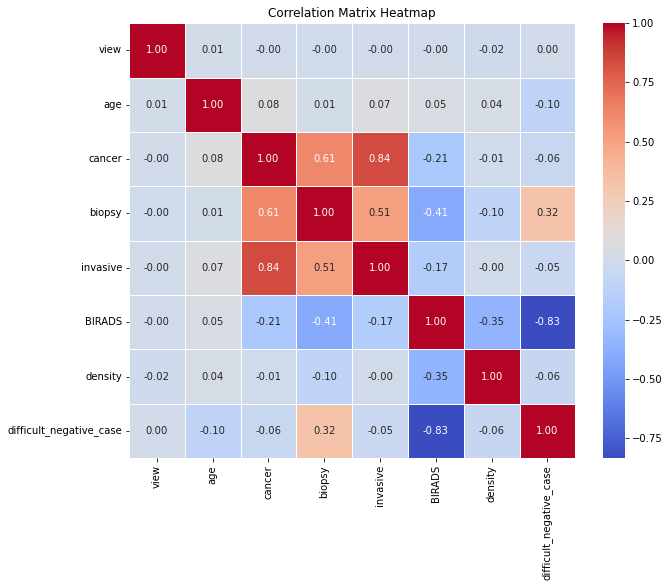

<Figure size 432x288 with 0 Axes>

In [15]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame with multiple columns to be label encoded
columns_to_encode = ['density', 'view']

label_encoder = LabelEncoder()

# Apply label encoding to multiple columns
df_train[columns_to_encode] = df_train[columns_to_encode].apply(lambda col: label_encoder.fit_transform(col))



column_names_list = df_train.columns.tolist()
print(column_names_list)
corr_df = df_train.drop(columns=['patient_id', 'laterality', 'site_id', 'image_id', 'implant', 'machine_id'])
correlation_matrix = corr_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
plt.savefig("heatmap.png", bbox_inches='tight', facecolor='white')


- The correlation matrix reveals a robust positive correlation between the 'biopsy' and 'invasive' columns, while indicating a negative correlation of -0.21 with the 'BiRADS' column. There seems to be no correlation with the rest of the columns.

In [16]:
#apply SelectKBest class to extract top 10 best features
y = corr_df['cancer']  # Target variable

# Selecting all columns except the one used as the target variable
X = corr_df.drop('cancer', axis=1)  
X.dropna(axis=0, inplace=True)
y = y[X.index]  # Adjust y accordingly if rows are removed from X


bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

                     Specs         Score
3                 invasive  17344.653614
2                   biopsy   6293.966911
1                      age    692.283645
4                   BIRADS    526.026648
6  difficult_negative_case    196.608135


The selectkbest confirms the before for biopsy and invasive.

<h3> Exploring images <h3>

- Examining the contents of the train and test image folders, we observe that the data is provided in DICOM file format. These files represent CT scans, which capture information about the radiodensity of objects or tissues exposed to x-rays. The CT scan generates transversal slices by reconstructing measurements taken from various directions.

- To standardize the data across different measurement settings, such as acquisition parameters and tube voltage, it is necessary to convert the pixel values to Hounsfield units (HU). This normalization involves referencing values to water (assigned HU 0) and air (assigned HU -1000), allowing for comparability between images.

- CT scans typically yield around 4000 grey values, which are beyond the perceptual range of the human eye. To address this, windowing is applied. Windowing involves displaying the image within a specific HU range, tailored to the region of interest. This process enhances the visibility of relevant details in the CT scan images.

In [17]:
from os import listdir
!pip install pydicom
!pip install dicomsdl
import dicomsdl  # or from dicomsdl import some_function




import pydicom
#D:\\rsna-breast-cancer-detection\\train_images\\
train_path = 'D://rsna-breast-cancer-detection/train_images/'

def load_scans(path, patient_id):
    dcm_path = path + str(patient_id)
    slices = [dicomsdl.open(dcm_path + '/' + file) for file in listdir(dcm_path)]
    return slices



patient_ids = df_train.patient_id.unique()
scans = load_scans(train_path, patient_ids[0])


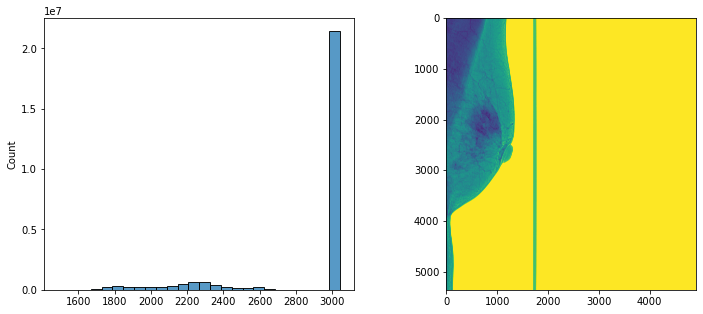

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15,5), gridspec_kw={'width_ratios': [0.5, 1]})
sns.histplot(scans[0].pixelData().flatten(), ax=ax[0])
ax[1].imshow(scans[0].pixelData())
plt.subplots_adjust(wspace=-0.2)  # You can experiment with different values

plt.savefig("histplot.png", bbox_inches='tight', facecolor='white')


The background seems to be above 3000. As the raw values depend on the machine, it could be worth it to explore background values dependent on the machine id.

In [19]:
from scipy.stats import mode, skew

background_values = []
rows = []
columns = []
for mid in df_train.machine_id.unique():
    mid_background_values = []
    mid_rows = []
    mid_columns = []
    print(f'machine id {mid} in progress')
    for n in range(50):
        try:
            scans = load_scans(train_path, df_train[df_train.machine_id==mid].patient_id.unique()[n])
            mid_background_values.append(mode(scans[0].pixelData().flatten())[0][0])
            mid_rows.append(scans[0].Rows)
            mid_columns.append(scans[0].Columns)
        except IndexError:
            break
    background_values.append(mid_background_values)
    rows.append(mid_rows)
    columns.append(mid_columns)

machine id 29 in progress


KeyboardInterrupt: 

In [20]:
machine_ids = df_train.machine_id.unique()

for n in range(len(background_values)):
    print(machine_ids[n], np.median(background_values[n]), np.std(background_values[n]))

In [21]:
for l in range(len(columns)):
    print(f"machine id {df_train.machine_id.unique()[l]}, unique columns: {np.unique(columns[l])}")

In [22]:
for l in range(len(rows)):
    print(f"machine id {df_train.machine_id.unique()[l]}, unique rows: {np.unique(rows[l])}")

- The dimensions of the image are dependent upon the specific machine identifier (machine ID).

In [23]:
df_train[df_train.cancer==1].invasive.value_counts() / df_train[df_train.cancer==1].shape[0]


1    0.70639
0    0.29361
Name: invasive, dtype: float64

Roughly 70 % of all images displaying cancer are showing invasive cancer 

In [24]:
!pip install opencv-python


type <class 'numpy.ndarray'>x 1750  y0 w 3165 h 5355


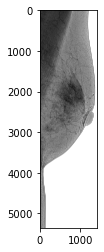

In [30]:

import cv2
from PIL import Image 

scans = load_scans(train_path, patient_ids[0])

image = scans[0].pixelData()
#image = self.get_pixels_hu(slice)
plt.imshow(image, cmap='gray')
# Normalize pixel values to 8-bit (0 to 255)

image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
# Convert to 8-bit unsigned integer
image = image.astype('uint8')
original_image = image.copy()

_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#plt.imshow(image, cmap='gray')
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w > 100 and h >100:
        if 0 <= y < y + h <= original_image.shape[0] and 0 <= x < x + w <= original_image.shape[1]:
            print(f"type {type(original_image)}x {x}  y{y} w {w} h {h}")
            image = image[y-y:h-y, x-x:w-x]
            break

plt.imshow(image, cmap='gray')




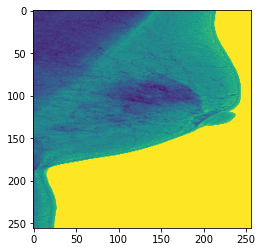

In [85]:
original_image = image.copy()
image = cv2.resize(image, (256, 256))
plt.imshow(image)

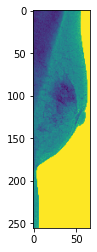

In [91]:
import cv2

def resize_with_aspect_ratio(image, target_size):
    # Get the original image size
    original_height, original_width = image.shape[:2]

    # Calculate the aspect ratio
    aspect_ratio = original_width / float(original_height)

    # If target_size is specified as width
    if target_size[0] is not None:
        new_width = target_size[0]
        new_height = int(new_width / aspect_ratio)
    # If target_size is specified as height
    elif target_size[1] is not None:
        new_height = target_size[1]
        new_width = int(new_height * aspect_ratio)
    else:
        raise ValueError("Specify either width or height in target_size")

    # Resize the image while maintaining the aspect ratio
    resized_image = cv2.resize(image, (new_width, new_height))

    return resized_image


# Specify the target size (either width or height)
target_size = (None, 256)  # For width of 300 pixels, None for maintaining aspect ratio

resized_image = resize_with_aspect_ratio(original_image, target_size)
plt.imshow(resized_image)

5355
4915
True
True


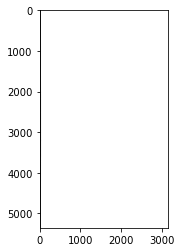

In [72]:
x = 1750  
y= 0 
w = 3165 
h = 5355
print(original_image.shape[0])
print(original_image.shape[1])
print(0 <= y < y + h <= original_image.shape[0])
print(0 <= x < x + w <= original_image.shape[1])
if 0 <= y < y + h <= original_image.shape[0] and 0 <= x < x + w <= original_image.shape[1]:
    # Crop the image
    cropped_image = original_image[y:(y + h), x:(x + w)]

    # Display the cropped image
    plt.imshow(cropped_image, cmap='gray')
    plt.show()
else:
    print("Invalid cropping coordinates. Please check the values.")

